<a href="https://colab.research.google.com/github/cipherchawla/Twitter-sentinment_analysis/blob/main/walmart_sales_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Walmart (1) (1).csv",skipinitialspace=True)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df.columns


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.shape

(6435, 8)

In [ ]:
df.loc[df['Store']==2]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
143,2,05-02-2010,2136989.46,0,40.19,2.572,210.752605,8.324
144,2,12-02-2010,2137809.50,1,38.49,2.548,210.897994,8.324
145,2,19-02-2010,2124451.54,0,39.69,2.514,210.945160,8.324
146,2,26-02-2010,1865097.27,0,46.10,2.561,210.975957,8.324
147,2,05-03-2010,1991013.13,0,47.17,2.625,211.006754,8.324
...,...,...,...,...,...,...,...,...
281,2,28-09-2012,1746470.56,0,79.45,3.666,222.616433,6.565
282,2,05-10-2012,1998321.04,0,70.27,3.617,222.815930,6.170
283,2,12-10-2012,1900745.13,0,60.97,3.601,223.015426,6.170
284,2,19-10-2012,1847990.41,0,68.08,3.594,223.059808,6.170


In [ ]:
df.rename(columns = {"Date":"Date"},inplace = True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
import pandas as pd

store_dataframes = {}


unique_stores = df['Store'].unique()
for store_number in unique_stores:

    store_data = df[df['Store'] == store_number]


    store_dataframes[store_number] = store_data


store_2_data = store_dataframes[2]

# printing the data for store 2 , for now we will be doing predicitons for store 2 only.
store_2_data


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
143,2,2010-02-05,2136989.46,0,40.19,2.572,210.752605,8.324
144,2,2010-02-12,2137809.50,1,38.49,2.548,210.897994,8.324
145,2,2010-02-19,2124451.54,0,39.69,2.514,210.945160,8.324
146,2,2010-02-26,1865097.27,0,46.10,2.561,210.975957,8.324
147,2,2010-03-05,1991013.13,0,47.17,2.625,211.006754,8.324
...,...,...,...,...,...,...,...,...
281,2,2012-09-28,1746470.56,0,79.45,3.666,222.616433,6.565
282,2,2012-10-05,1998321.04,0,70.27,3.617,222.815930,6.170
283,2,2012-10-12,1900745.13,0,60.97,3.601,223.015426,6.170
284,2,2012-10-19,1847990.41,0,68.08,3.594,223.059808,6.170


In [ ]:
store_2_data.shape

(143, 8)

In [ ]:
store_2_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 143 to 285
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 10.1 KB


In [ ]:
store_2_data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
store_2_data.duplicated().sum()

0

In [ ]:
store_2_data.set_index("Date",inplace = True)

In [ ]:
store_2_data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,2,2136989.46,0,40.19,2.572,210.752605,8.324
2010-02-12,2,2137809.50,1,38.49,2.548,210.897994,8.324
2010-02-19,2,2124451.54,0,39.69,2.514,210.945160,8.324
2010-02-26,2,1865097.27,0,46.10,2.561,210.975957,8.324
2010-03-05,2,1991013.13,0,47.17,2.625,211.006754,8.324
...,...,...,...,...,...,...,...
2012-09-28,2,1746470.56,0,79.45,3.666,222.616433,6.565
2012-10-05,2,1998321.04,0,70.27,3.617,222.815930,6.170
2012-10-12,2,1900745.13,0,60.97,3.601,223.015426,6.170


In [ ]:
#Code for Outliers detection and outlier removal , In this df I am deciding not to remove any outliers
# def remove_outliers_iqr(df, columns):

#     df_no_outliers = df.copy()

#     for column in columns:

#         Q1 = df_no_outliers[column].quantile(0.25)
#         Q3 = df_no_outliers[column].quantile(0.75)


#         IQR = Q3 - Q1


#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR


#         df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

#     return df_no_outliers


# columns_to_remove_outliers = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


# walmart_df_no_outliers = remove_outliers_iqr(store_2_data, columns_to_remove_outliers)


# walmart_df_no_outliers

In [ ]:
store_data = pd.DataFrame(store_2_data["Weekly_Sales"])

store_data

,Weekly_Sales
Date,
2010-02-05,2136989.46
2010-02-12,2137809.50
2010-02-19,2124451.54
2010-02-26,1865097.27
2010-03-05,1991013.13
...,...
2012-09-28,1746470.56
2012-10-05,1998321.04
2012-10-12,1900745.13


# Now since we have a dedicated dataset for each store

## We will answer the questions based on the Questions

## Later on we will move on to decomposing of the data to find trend seasonality and residuals

## Lastly we will conclude with Model Building and Sales forecasting


## EDA

Text(0, 0.5, 'Sales')

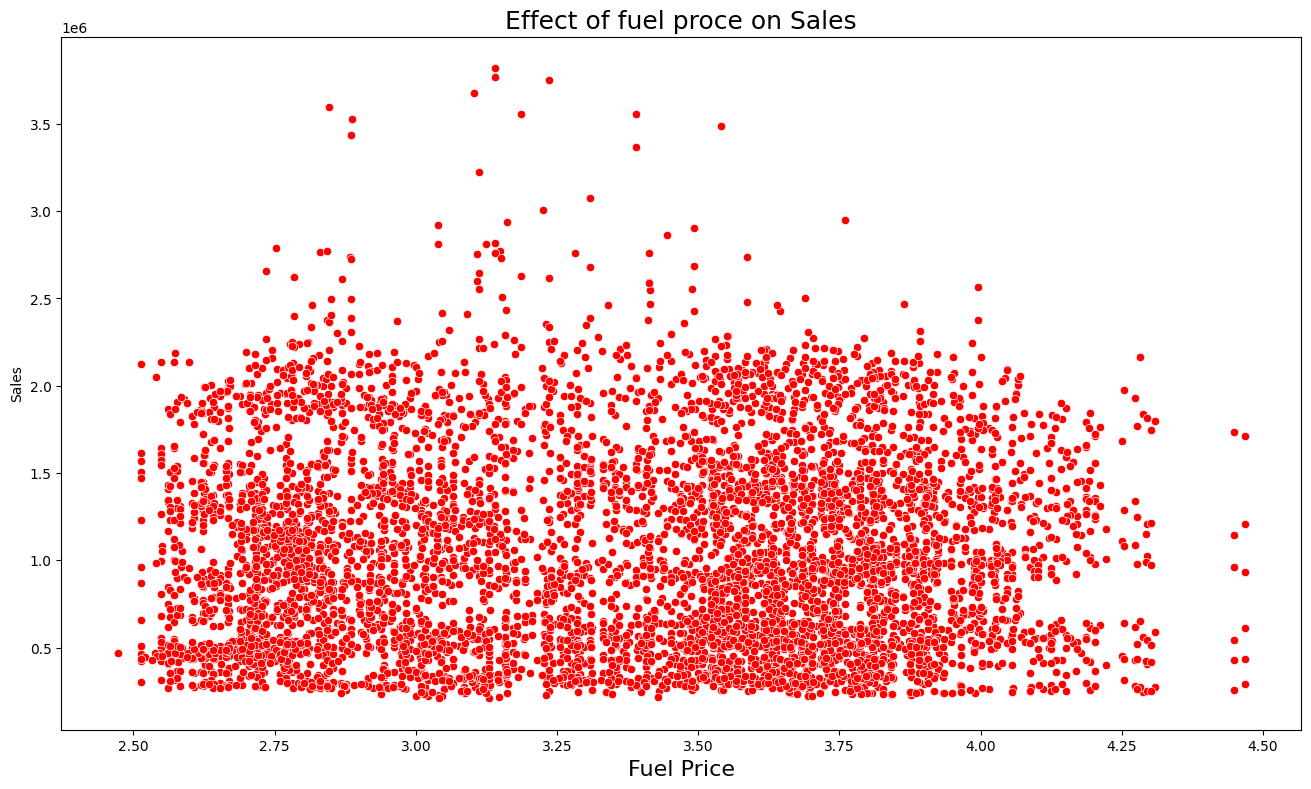

In [ ]:
# checcking the impact of fuel price on overall sales


plt.figure(figsize = (16,9))
sns.scatterplot(data = df,x = df["Fuel_Price"],y = df["Weekly_Sales"],color = 'r')
plt.title("Effect of fuel proce on Sales",fontsize = 18)
plt.xlabel("Fuel Price",fontsize = 16)
plt.ylabel("Sales")


In [ ]:
# first we will check store wise comparison of holiday week sales and non holiday week sales

import pandas as pd




store_sales_means = df.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean()

for store_num in df['Store'].unique():
    holiday_mean = store_sales_means[store_num, 1]
    non_holiday_mean = store_sales_means[store_num, 0]

    print(f"Store {store_num}:")
    print("Mean sales for holiday weeks: ", holiday_mean)
    print("Mean sales for non-holiday weeks: ", non_holiday_mean)
    print()


Store 1:
Mean sales for holiday weeks:  1665747.656
Mean sales for non-holiday weeks:  1546957.3856390978

Store 2:
Mean sales for holiday weeks:  2079266.9
Mean sales for non-holiday weeks:  1914208.8118796991

Store 3:
Mean sales for holiday weeks:  437811.05
Mean sales for non-holiday weeks:  400064.84639097744

Store 4:
Mean sales for holiday weeks:  2243102.6240000003
Mean sales for non-holiday weeks:  2083555.8431578947

Store 5:
Mean sales for holiday weeks:  359501.60699999996
Mean sales for non-holiday weeks:  314892.2769172932

Store 6:
Mean sales for holiday weeks:  1680907.927
Mean sales for non-holiday weeks:  1555992.867443609

Store 7:
Mean sales for holiday weeks:  672400.265
Mean sales for non-holiday weeks:  562964.4548120301

Store 8:
Mean sales for holiday weeks:  975330.86
Mean sales for non-holiday weeks:  903743.402481203

Store 9:
Mean sales for holiday weeks:  588950.821
Mean sales for non-holiday weeks:  540599.3291729323

Store 10:
Mean sales for holiday week

Mean sales for the days when it was a holiday week:  2079266.9

Mean sales for the days when it was a non holiday week:  1914208.8118796994
None


Text(0, 0.5, 'Sales Amount')

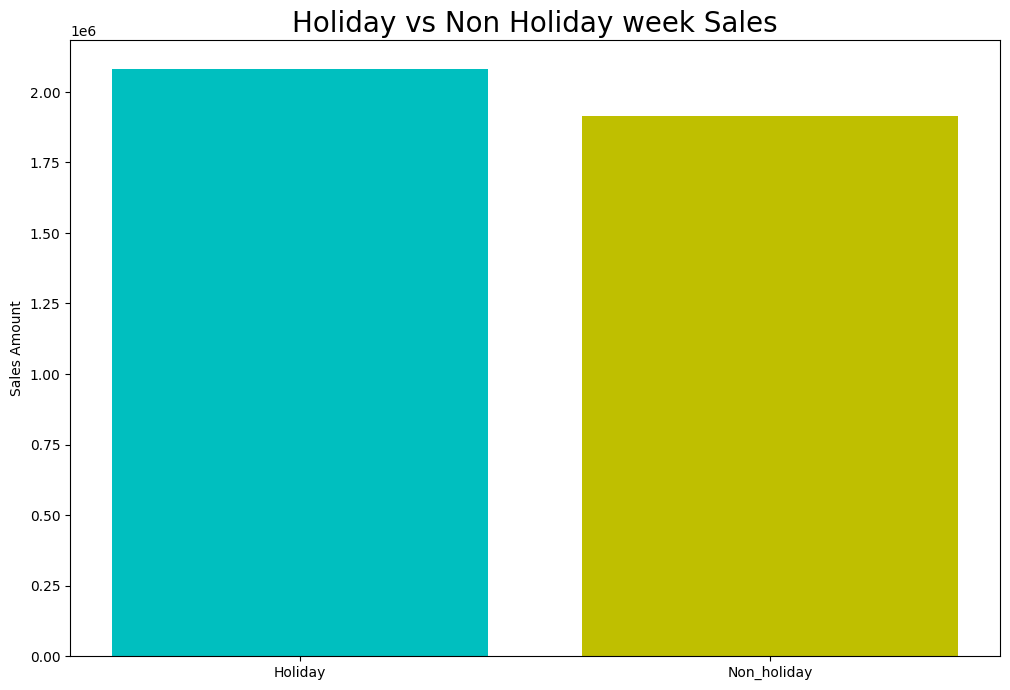

In [ ]:
# let's compare the avg sales when the day is holiday and on normal days fot store number 2 for which we are working

holiday = store_2_data.loc[store_2_data['Holiday_Flag']==1].Weekly_Sales.mean()
non_holiday=  store_2_data.loc[store_2_data['Holiday_Flag']==0].Weekly_Sales.mean()

print("Mean sales for the days when it was a holiday week: ",holiday)
print()
print(print("Mean sales for the days when it was a non holiday week: ",non_holiday))

# Conclusion their is a significance drop when it's a non Holiday week - Around 8%
# we can see that through visulaization also.

values = [holiday,non_holiday]
labels = ["Holiday","Non_holiday"]

plt.figure(figsize=(12,8))
plt.bar(labels,values,color = ['c','y'])
plt.title("Holiday vs Non Holiday week Sales",fontsize = 20)
plt.ylabel("Sales Amount")

## Questions

In [ ]:
# a. If the weekly sales are affected by the unemployment rate, if yes - which stores
# are suffering the most?



# Calculating the correlation
correlation = df['Weekly_Sales'].corr(df['Unemployment'])

print(f"Correlation between Weekly_Sales and Unemployment: {correlation}")

# Identify stores with the highest Correlation
correlation_df = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack().dropna()
stores_suffering = correlation_df['Weekly_Sales']['Unemployment'].sort_values().index[0]

print(f"Store(s) suffering the most: {stores_suffering}")

Correlation between Weekly_Sales and Unemployment: -0.10617608965795429
Store(s) suffering the most: 38


Store 2: Correlation with Unemployment = 0.07,

Text(0.5, 1.0, 'Unemployement vs Weekly sales')

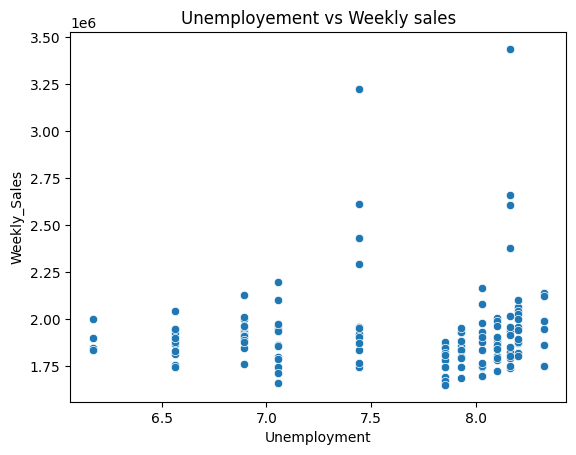

In [ ]:
# Finding for the store number 2 specifically.

grouped_by_store = store_2_data.groupby('Store')


store_correlations = {}


for store_num, store_data in grouped_by_store:

    correlation = store_data['Weekly_Sales'].corr(store_data['Unemployment'])


    store_correlations[store_num] = correlation

sorted_store_correlations = sorted(store_correlations.items(), key=lambda x: x[1], reverse=True)

store_corr = []
for store_num, correlation in sorted_store_correlations:
    print(f"Store {store_num}: Correlation with Unemployment = {correlation:.2f}",end=',')
    store_corr.append([store_num,correlation])

# visualization

sns.scatterplot(data = store_2_data , x = 'Unemployment',y= 'Weekly_Sales')
plt.title("Unemployement vs Weekly sales")

# Cocnlusion we cannot say their is much effect of unemployement on the weekly_sales for this store.

In [ ]:
# b. If the weekly sales show a seasonal trend, when and what could be the reason?


Text(0, 0.5, 'Amount')

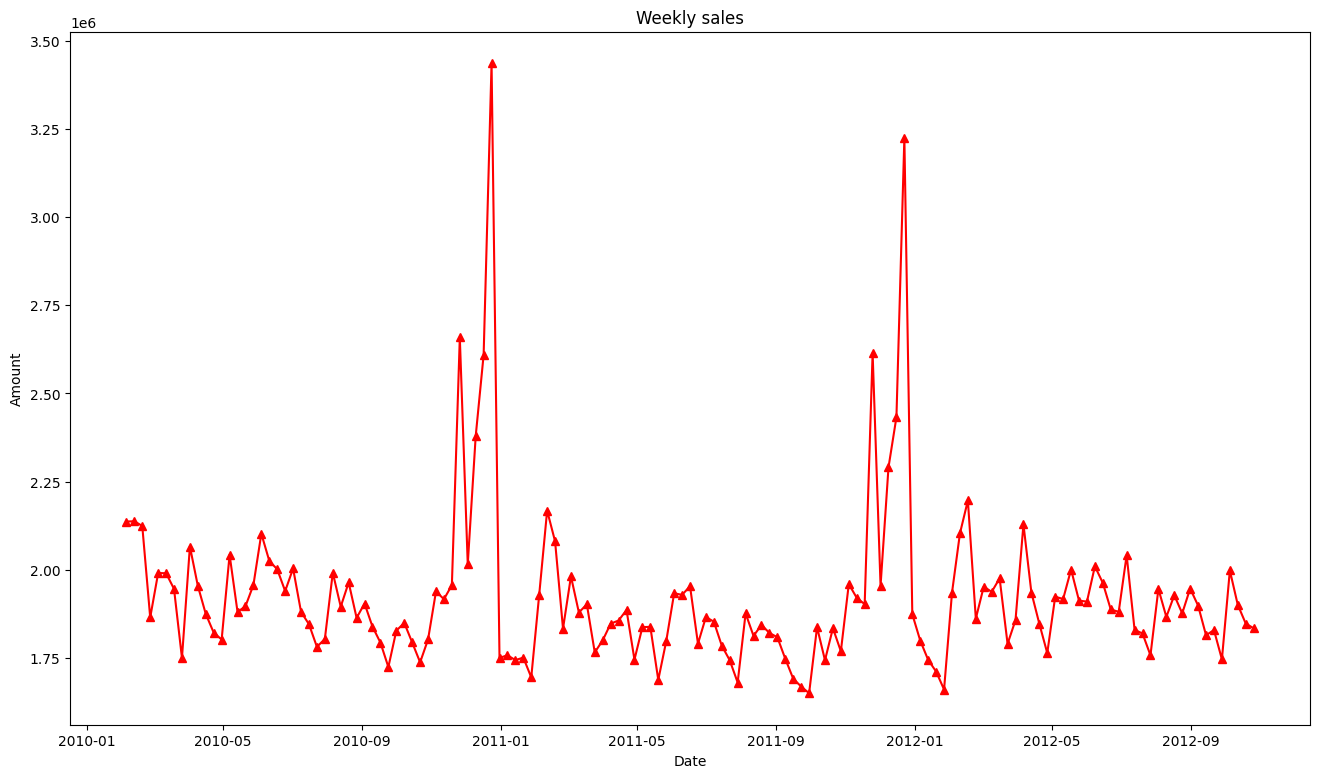

In [ ]:
# first we will plt the actual plot
plt.figure(figsize = (16,9))
plt.plot(store_data["Weekly_Sales"],marker = "^",color = 'r')
plt.title("Weekly sales")
plt.xlabel("Date")
plt.ylabel("Amount")

# From the visualation itself we can see their is Seasonality present in the data and also Stationarity can be seen

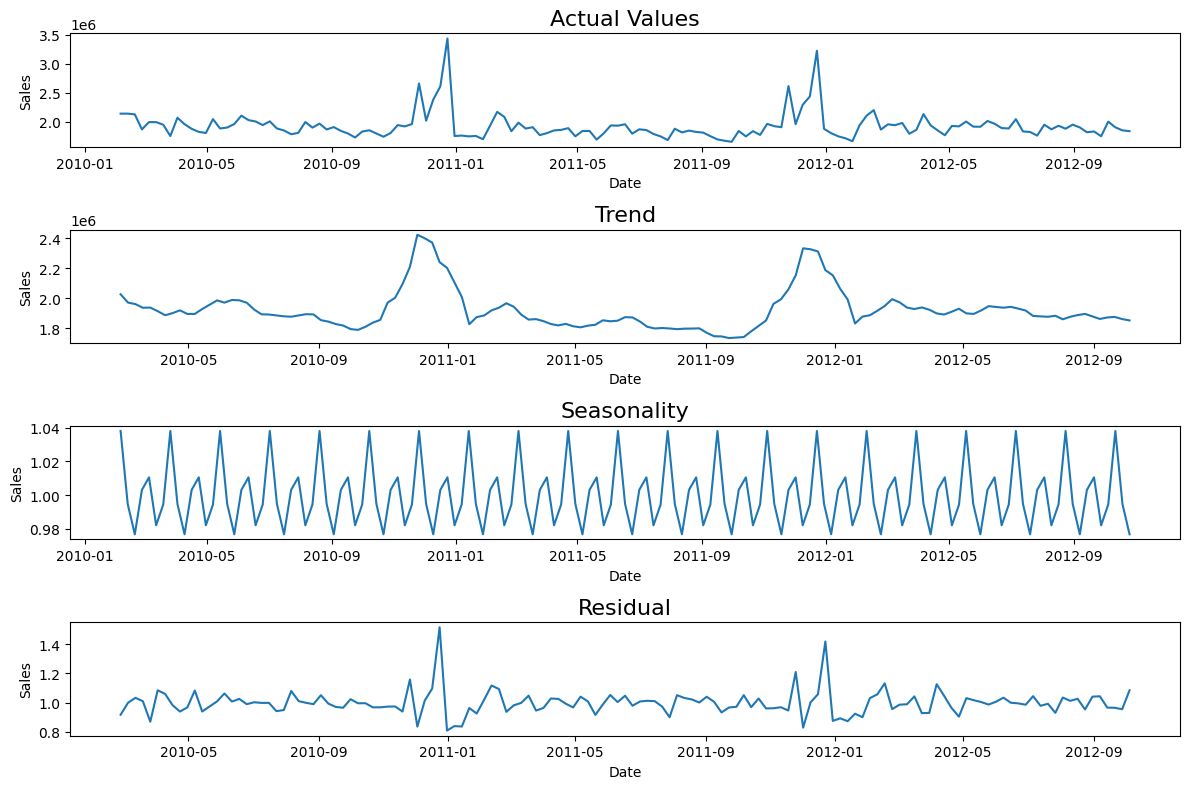

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


mul = seasonal_decompose(store_data["Weekly_Sales"], model='multiplicative', period=7)


plt.figure(figsize=(12, 8))


plt.subplot(411)
plt.plot(mul.observed)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual Values",fontsize = 16)


plt.subplot(412)
plt.plot(mul.trend)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Trend",fontsize = 16)



plt.subplot(413)
plt.plot(mul.seasonal)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Seasonality",fontsize = 16)



plt.subplot(414)
plt.plot(mul.resid)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Residual",fontsize = 16)


plt.tight_layout()
plt.show()


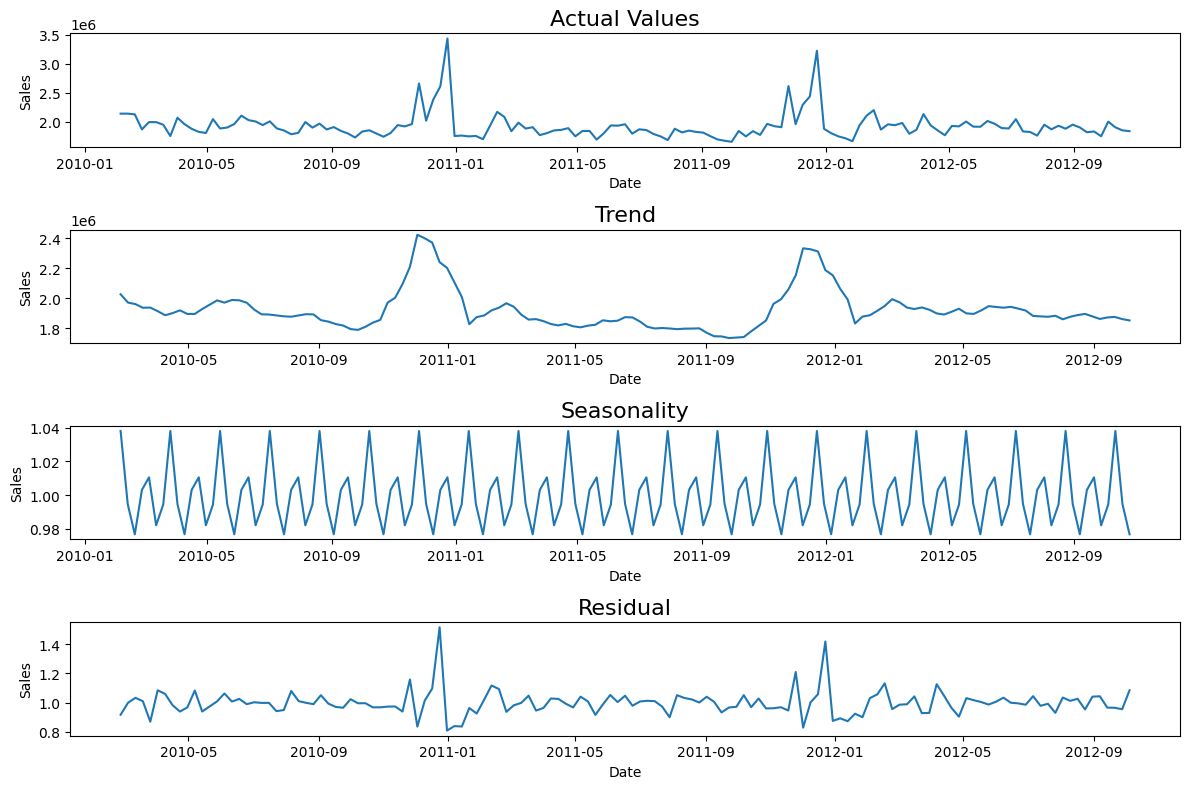

In [ ]:
# now checking with additive model


add = seasonal_decompose(store_data["Weekly_Sales"], model='additive', period=7)


plt.figure(figsize=(12, 8))


plt.subplot(411)
plt.plot(mul.observed)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual Values",fontsize = 16)


plt.subplot(412)
plt.plot(mul.trend)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Trend",fontsize = 16)



plt.subplot(413)
plt.plot(mul.seasonal)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Seasonality",fontsize = 16)



plt.subplot(414)
plt.plot(mul.resid)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Residual",fontsize = 16)


plt.tight_layout()
plt.show()

In [ ]:
# now creating a df to check the values of additive and multiplicative models

Decomposition_val = pd.concat([add.observed,add.seasonal,add.trend,add.resid],axis = 1)
Decomposition_val.columns = ["Actual","Seasonality","Trend","Residuals"]
pd.options.display.float_format = '{:.2f}'.format
Decomposition_val.head()


# by observing the data we can clearly identify the Seasonality present , and somewhere we can see trends and residuals also.

,Actual,Seasonality,Trend,Residuals
Date,,,,
2010-02-05,2136989.46,81034.04,NaN,NaN
2010-02-12,2137809.50,-16749.53,NaN,NaN
2010-02-19,2124451.54,-46874.15,NaN,NaN
2010-02-26,1865097.27,8869.95,2027416.51,-171189.19
2010-03-05,1991013.13,25273.26,1972160.56,-6420.69


In [ ]:
Decomposition_val_mul = pd.concat([mul.observed,mul.seasonal,mul.trend,mul.resid],axis = 1)
Decomposition_val_mul.columns = ["Actual","Seasonality","Trend","Residuals"]
pd.options.display.float_format = '{:.2f}'.format
Decomposition_val_mul.head()


,Actual,Seasonality,Trend,Residuals
Date,,,,
2010-02-05,2136989.46,1.04,NaN,NaN
2010-02-12,2137809.50,0.99,NaN,NaN
2010-02-19,2124451.54,0.98,NaN,NaN
2010-02-26,1865097.27,1.00,2027416.51,0.92
2010-03-05,1991013.13,1.01,1972160.56,1.00


Correlation between Temperature and Weekly Sales: -0.30
There is a negative correlation between temperature and weekly sales.


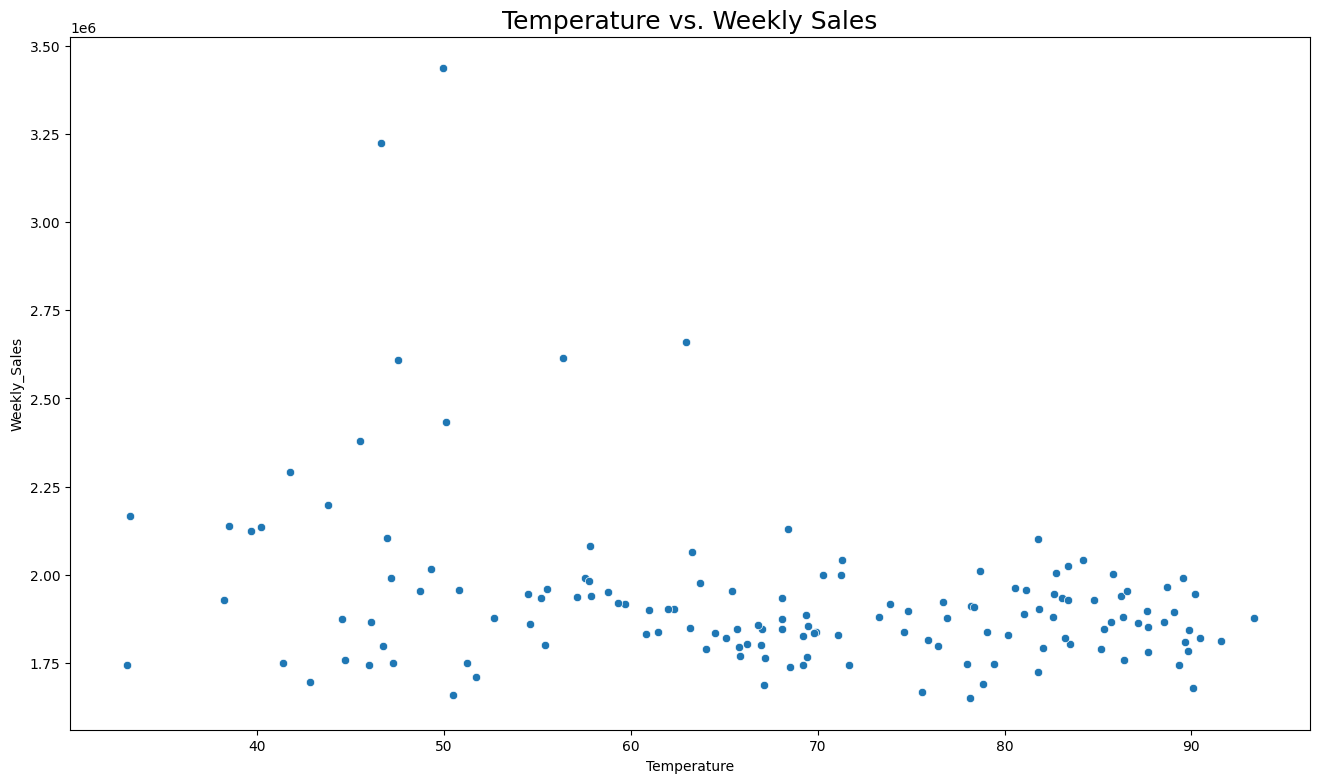

In [ ]:
# c. Does temperature affect the weekly sales in any manner?

# Calculate the correlation between 'Temperature' and 'Weekly_Sales'
correlation = store_2_data['Temperature'].corr(store_2_data['Weekly_Sales'])

# Print the correlation coefficient
print(f"Correlation between Temperature and Weekly Sales: {correlation:.2f}")

# Interpret the correlation
if correlation > 0:
    print("There is a positive correlation between temperature and weekly sales.")
elif correlation < 0:
    print("There is a negative correlation between temperature and weekly sales.")
else:
    print("There is no significant correlation between temperature and weekly sales.")

# we can see there is a negative co-relation which means as the temp increases the sales go down due to excess heat or cold.

# validating the same with visualization also

plt.figure(figsize=(16, 9))
sns.scatterplot(data=store_2_data, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs. Weekly Sales',fontsize = 18)
plt.show()


In [ ]:
store_2_data.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,NaN,1.00,0.18,-0.30,-0.20,-0.06,0.07
Holiday_Flag,NaN,0.18,1.00,-0.19,-0.09,-0.03,0.04
Temperature,NaN,-0.30,-0.19,1.00,0.21,0.12,-0.14
Fuel_Price,NaN,-0.20,-0.09,0.21,1.00,0.76,-0.63
CPI,NaN,-0.06,-0.03,0.12,0.76,1.00,-0.96
Unemployment,NaN,0.07,0.04,-0.14,-0.63,-0.96,1.00


Correlation between CPI and Weekly Sales: -0.06
There is a negative correlation between CPI and weekly sales.


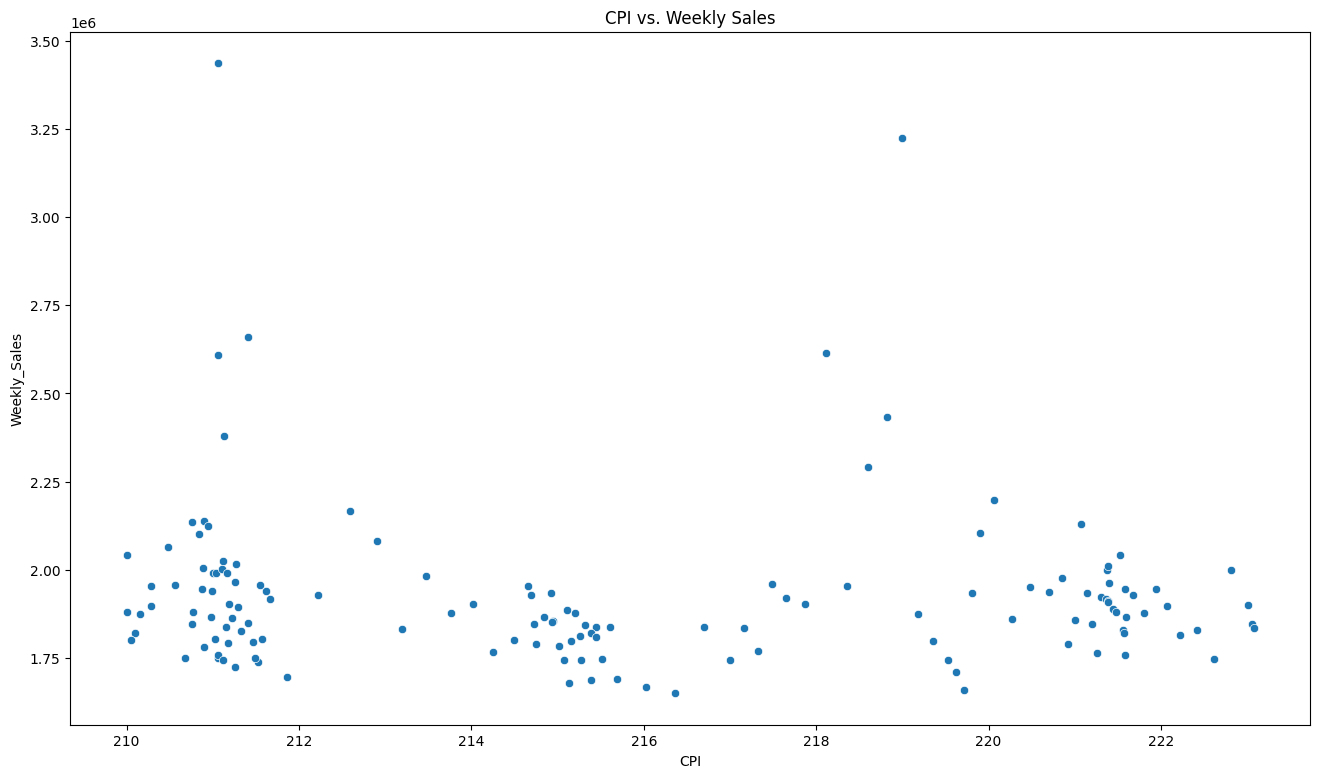

In [ ]:
# d. How is the Consumer Price index affecting the weekly sales of various stores?

correlation = store_2_data['CPI'].corr(store_2_data['Weekly_Sales'])


print(f"Correlation between CPI and Weekly Sales: {correlation:.2f}")


if correlation > 0:
    print("There is a positive correlation between CPI and weekly sales.")
elif correlation < 0:
    print("There is a negative correlation between CPI and weekly sales.")
else:
    print("There is no significant correlation between CPI and weekly sales.")

# Now let's visualize the same for better understanding

plt.figure(figsize=(16, 9))
sns.scatterplot(data=store_2_data, x='CPI', y='Weekly_Sales')
plt.title('CPI vs. Weekly Sales')
plt.show()

# Both form correlation and visualization we can observe that their is no much relation between CPI and Weekly Sales.

In [ ]:
# Top performing stores according to the historical data.

# top performing store

sales = df.groupby('Store')['Weekly_Sales'].mean()

sorted_sales = sales.sort_values(ascending = False)


formatted_sorted_stores = sorted_sales.apply(lambda x: '{:.2f}'.format(x))




top10 = formatted_sorted_stores.head(10)


print("The top 10 Performing stores are:")
print()

top10

The top 10 Performing stores are:



Store
20    2107676.87
4     2094712.96
14    2020978.40
13    2003620.31
2     1925751.34
10    1899424.57
27    1775216.20
6     1564728.19
1     1555264.40
39    1450668.13
Name: Weekly_Sales, dtype: object

In [ ]:
# f. The worst performing store, and how significant is the difference between the
# highest and lowest performing stores.
top10 = pd.DataFrame(formatted_sorted_stores.head(10))
low10 = pd.DataFrame(formatted_sorted_stores.tail(10))

low10

,Weekly_Sales
Store,
29,539451.43
16,519247.73
37,518900.28
30,438579.62
3,402704.44
38,385731.65
36,373511.99
5,318011.81
44,302748.87


In [ ]:
top10['Weekly_Sales'] = top10['Weekly_Sales'].astype(float)
low10['Weekly_Sales'] = low10['Weekly_Sales'].astype(float)

In [ ]:
# diffrence between top 10 and low 10



top10.reset_index(drop=True, inplace=True)
low10.reset_index(drop=True, inplace=True)

# Calculate the difference between 'top10' and 'low10' for each element
difference_df = top10.sub(low10)

difference_df["Top_10_values"] = top10
difference_df["Min_10_values"] = low10

difference_df.rename(columns = {"Weekly_Sales":'Significance_of_Difference'},inplace = True)

difference_df

,Significance_of_Difference,Top_10_values,Min_10_values
0,1568225.44,2107676.87,539451.43
1,1575465.23,2094712.96,519247.73
2,1502078.12,2020978.40,518900.28
3,1565040.69,2003620.31,438579.62
4,1523046.90,1925751.34,402704.44
5,1513692.92,1899424.57,385731.65
6,1401704.21,1775216.20,373511.99
7,1246716.38,1564728.19,318011.81
8,1252515.53,1555264.40,302748.87
9,1190806.44,1450668.13,259861.69


In [ ]:
difference_df = difference_df[[col for col in difference_df.columns if col != 'Significance_of_Difference'] + ['Significance_of_Difference']]
difference_df

,Top_10_values,Min_10_values,Significance_of_Difference
0,2107676.87,539451.43,1568225.44
1,2094712.96,519247.73,1575465.23
2,2020978.40,518900.28,1502078.12
3,2003620.31,438579.62,1565040.69
4,1925751.34,402704.44,1523046.90
5,1899424.57,385731.65,1513692.92
6,1775216.20,373511.99,1401704.21
7,1564728.19,318011.81,1246716.38
8,1555264.40,302748.87,1252515.53
9,1450668.13,259861.69,1190806.44


## Stationarity check using ADF test

In [ ]:
store_2_data = store_2_data["Weekly_Sales"]

In [ ]:
# ADF test is perfoemed to check whether data is staionary or nor

# H0 = Data is non-statinary
# H1 = Data is Stationary


from statsmodels.tsa.stattools import adfuller

result = adfuller(store_2_data)

stat = result[0]
p_value = result[1]
print("P value is :",p_value)

if p_value < 0.05:
    print("The Data is Stationary")
else:
    print("Data is not stationary ")

P value is : 0.003990207089066268
The Data is Stationary


In [ ]:
# we will re_check using KPSS also

from statsmodels.tsa.stattools import kpss

result = kpss(store_2_data)

stat = result[0]
p_value = result[1]
print("P value is :",p_value)

if p_value < 0.05:
    print("The Data is  not Stationary")
else:
    print("Data is stationary ")

P value is : 0.1
Data is stationary 


<ipython-input-40-3b7e87f97faa>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(store_2_data)


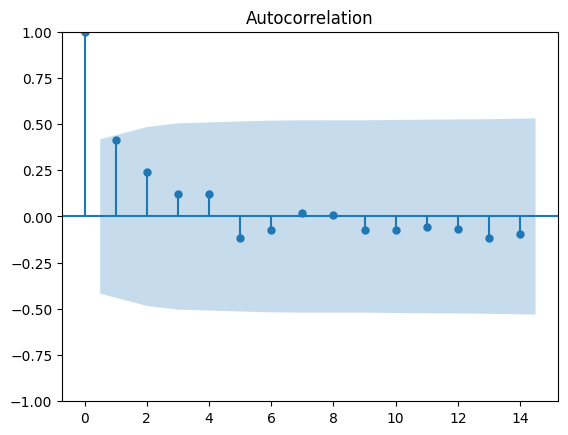

In [ ]:
# now conclusion from both the test is that the data is stationary so we will move on to ,model building first we will
# plot ACF and PACF for that

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf


acf_plot=acf(store_2_data.dropna()) #Gradual decrease and previuous point to that - 1
plot_acf(acf_plot);



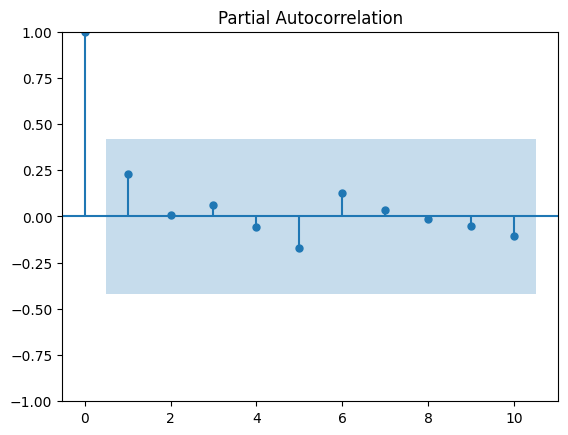

In [ ]:

from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

pacf=pacf(store_2_data.dropna()) #Gradual decrease and previuous point to that - 1
plot_pacf(pacf,lags= 10);

In [ ]:
# now Training the dataset into 80:20 # please note in Time series we do not used Rndome state as we need data in Sequence only.

train= store_2_data.iloc[:115]
test = store_2_data.iloc[115:]

## Model Building using Multiple Algorithms

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train,order=(4,0,2),seasonal_order=(4,0,2,7)) #(p,d,q)
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

<Axes: xlabel='Date'>

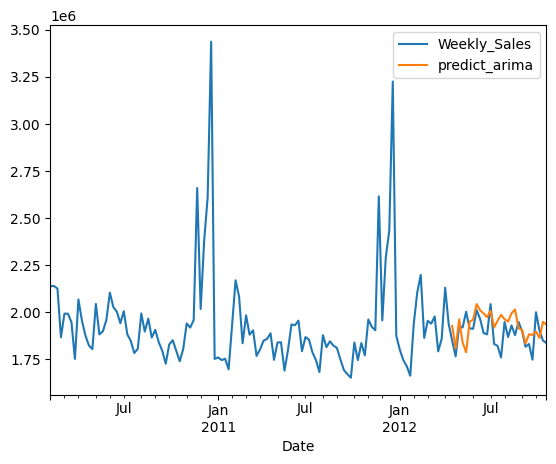

In [ ]:
store_data['predict_arima']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
store_data[['Weekly_Sales','predict_arima']].plot()


In [ ]:
store_data.drop(columns = ["Holiday_Flag","Holiday_Flag",'Temperature','Fuel_Price','CPI','Unemployment','Store'],axis = 1,inplace= True)

In [ ]:
store_data

,Weekly_Sales,predict_arima
Date,,
2010-02-05,2136989.46,NaN
2010-02-12,2137809.50,NaN
2010-02-19,2124451.54,NaN
2010-02-26,1865097.27,NaN
2010-03-05,1991013.13,NaN
...,...,...
2012-09-28,1746470.56,1877886.21
2012-10-05,1998321.04,1895980.09
2012-10-12,1900745.13,1861335.70


In [ ]:
# Forecasting using ARIMA for next 12 weeks

import pandas as pd


forecast_period = 12


last_date = store_data.index[-1]

# Create a date range for the future 12 weeks
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=forecast_period, freq='W')

# Use your ARIMA or SARIMAX model to forecast for the future
forecast_values = model_fit.forecast(steps=forecast_period)

# Create a DataFrame to hold the forecasts along with dates
forecast_Arima_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Arima_Sales': forecast_values})

# Print or use the forecast DataFrame
forecast_Arima_df.set_index("Date",inplace = True)
forecast_Arima_df

,Forecasted_Arima_Sales
Date,
2012-10-28,1925263.16
2012-11-04,1806094.19
2012-11-11,1960077.42
2012-11-18,1837037.78
2012-11-25,1785526.80
2012-12-02,1948133.03
2012-12-09,1959314.38
2012-12-16,2041610.73
2012-12-23,2009086.88


## SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,order=(4,0,2),seasonal_order = (4,0,2,7)) #(p,d,q)
model_Sari_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationar

<Axes: xlabel='Date'>

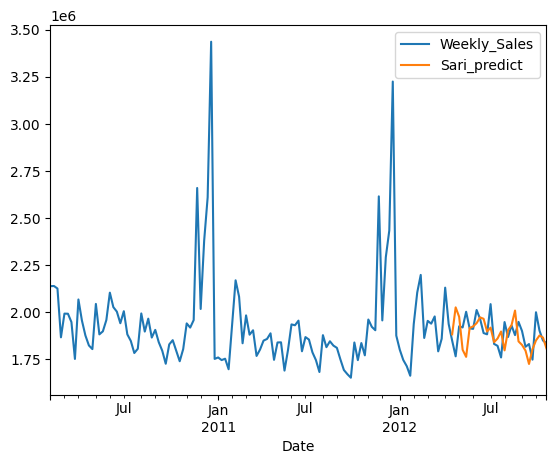

In [ ]:
store_data['Sari_predict']=model_Sari_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
store_data[['Weekly_Sales','Sari_predict']].plot()

In [ ]:
store_data


,Weekly_Sales,predict_arima,Sari_predict
Date,,,
2010-02-05,2136989.46,NaN,NaN
2010-02-12,2137809.50,NaN,NaN
2010-02-19,2124451.54,NaN,NaN
2010-02-26,1865097.27,NaN,NaN
2010-03-05,1991013.13,NaN,NaN
...,...,...,...
2012-09-28,1746470.56,1877886.21,1802253.02
2012-10-05,1998321.04,1895980.09,1848660.41
2012-10-12,1900745.13,1861335.70,1874737.19


In [ ]:
# #forecast_values


# forecast period (number of weeks) into the future
forecast_period = 12

# Getting the last date in your existing data (assuming the date is in the DataFrame index)
last_date = store_data.index[-1]

# Creating a date range for the future 12 weeks
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=forecast_period, freq='W')
forecast_values = model_Sari_fit.forecast(steps=forecast_period)

# Creating a DataFrame to hold the forecasts along with dates
forecast_sari_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sari_Sales': forecast_values})

# Printing or using the forecast DataFrame
forecast_sari_df.set_index("Date",inplace = True)
forecast_sari_df


,Forecasted_Sari_Sales
Date,
2012-10-28,1880742.07
2012-11-04,2024296.45
2012-11-11,1974283.22
2012-11-18,1798778.09
2012-11-25,1761273.62
2012-12-02,1914571.81
2012-12-09,1922955.92
2012-12-16,1940415.96
2012-12-23,1970956.96


In [ ]:
final_pred = forecast_Arima_df.join(forecast_sari_df)

In [ ]:
final_pred

# DF with Predcitions for next 12 weeks with both ARIMA and SARIMAX

,Forecasted_Arima_Sales,Forecasted_Sari_Sales
Date,,
2012-10-28,1925263.16,1880742.07
2012-11-04,1806094.19,2024296.45
2012-11-11,1960077.42,1974283.22
2012-11-18,1837037.78,1798778.09
2012-11-25,1785526.80,1761273.62
2012-12-02,1948133.03,1914571.81
2012-12-09,1959314.38,1922955.92
2012-12-16,2041610.73,1940415.96
2012-12-23,2009086.88,1970956.96


In [ ]:
store_data.dropna(inplace=True)

In [ ]:
actual_val = store_data["Weekly_Sales"]
Arima_test = store_data["predict_arima"]
sarima_test = store_data["Sari_predict"]

In [ ]:
# Validation by checking RMSE

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate MSE for both SARIMAX and ARIMA
sarimax_mse = mean_squared_error(actual_val.dropna(), Arima_test.dropna())
arima_mse = mean_squared_error(actual_val.dropna(), sarima_test.dropna())

# Calculate RMSE by taking the square root of MSE
sarimax_rmse = np.sqrt(sarimax_mse)
arima_rmse = np.sqrt(arima_mse)

# Print or use RMSE for evaluation
print(f"SARIMAX RMSE: {sarimax_rmse}")
print(f"ARIMA RMSE: {arima_rmse}")


SARIMAX RMSE: 94344.97140936748
ARIMA RMSE: 101136.44664535603


#STORE 1

In [ ]:
# Filter data for Store 1
store_1_data = df[df['Store'] == 1].copy()

In [ ]:
store_1_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.67,222.98,6.91
139,1,2012-10-05,1670785.97,0,68.55,3.62,223.18,6.57
140,1,2012-10-12,1573072.81,0,62.99,3.60,223.38,6.57
141,1,2012-10-19,1508068.77,0,67.97,3.59,223.43,6.57


In [ ]:
store_1_data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [ ]:
store_1_data.set_index('Date', inplace=True)
store_1_data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.57,211.10,8.11
2010-02-12,1,1641957.44,1,38.51,2.55,211.24,8.11
2010-02-19,1,1611968.17,0,39.93,2.51,211.29,8.11
2010-02-26,1,1409727.59,0,46.63,2.56,211.32,8.11
2010-03-05,1,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.67,222.98,6.91
2012-10-05,1,1670785.97,0,68.55,3.62,223.18,6.57
2012-10-12,1,1573072.81,0,62.99,3.60,223.38,6.57


In [ ]:
store_1_data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# Handling missing values
store_1_data.dropna(subset=['Weekly_Sales'], inplace=True)
store_1_data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.57,211.10,8.11
2010-02-12,1,1641957.44,1,38.51,2.55,211.24,8.11
2010-02-19,1,1611968.17,0,39.93,2.51,211.29,8.11
2010-02-26,1,1409727.59,0,46.63,2.56,211.32,8.11
2010-03-05,1,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.67,222.98,6.91
2012-10-05,1,1670785.97,0,68.55,3.62,223.18,6.57
2012-10-12,1,1573072.81,0,62.99,3.60,223.38,6.57


In [ ]:
# Checking for outliers
def remove_outliers_iqr(df, columns):
    df_no_outliers = df.copy()
    for column in columns:
        Q1 = df_no_outliers[column].quantile(0.25)
        Q3 = df_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
    return df_no_outliers

columns_to_remove_outliers = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
store_1_data_no_outliers = remove_outliers_iqr(store_1_data, columns_to_remove_outliers)

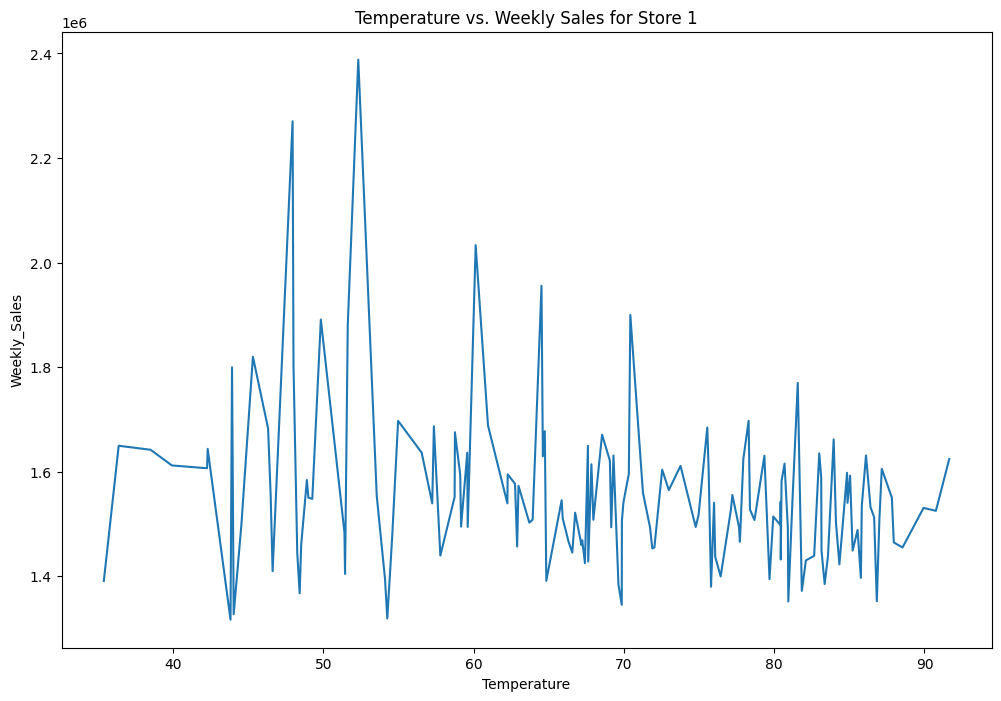

In [ ]:
# EDA - Exploratory Data Analysis
# Scatter plot to visualize the relationship between Temperature and Weekly_Sales
plt.figure(figsize=(12, 8))
sns.lineplot(data=store_1_data, x='Temperature', y='Weekly_Sales')
plt.title('Temperature vs. Weekly Sales for Store 1')
plt.show()

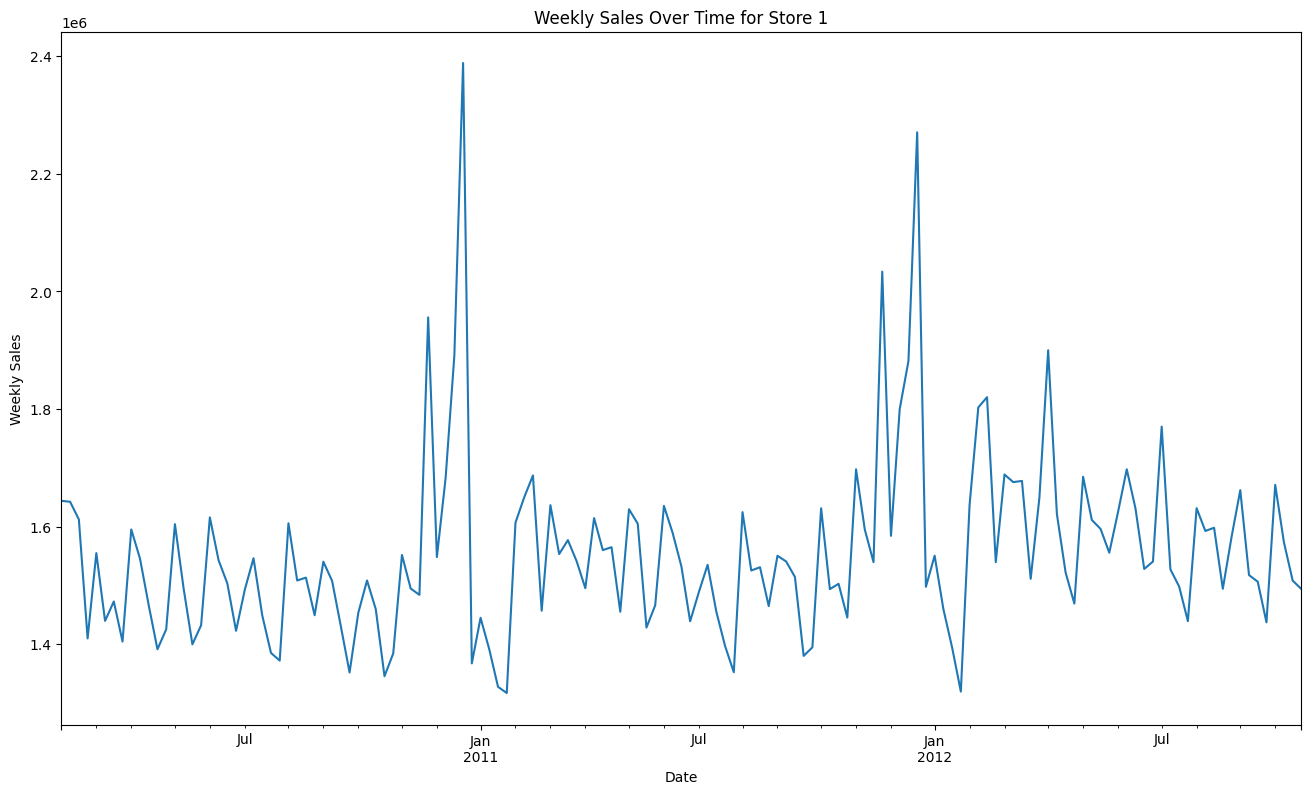

In [ ]:
#Time series plot of Weekly Sales
plt.figure(figsize=(16, 9))
store_1_data['Weekly_Sales'].plot()
plt.title('Weekly Sales Over Time for Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

RMSE for Store 1 (ARIMA): 81021.99575724856


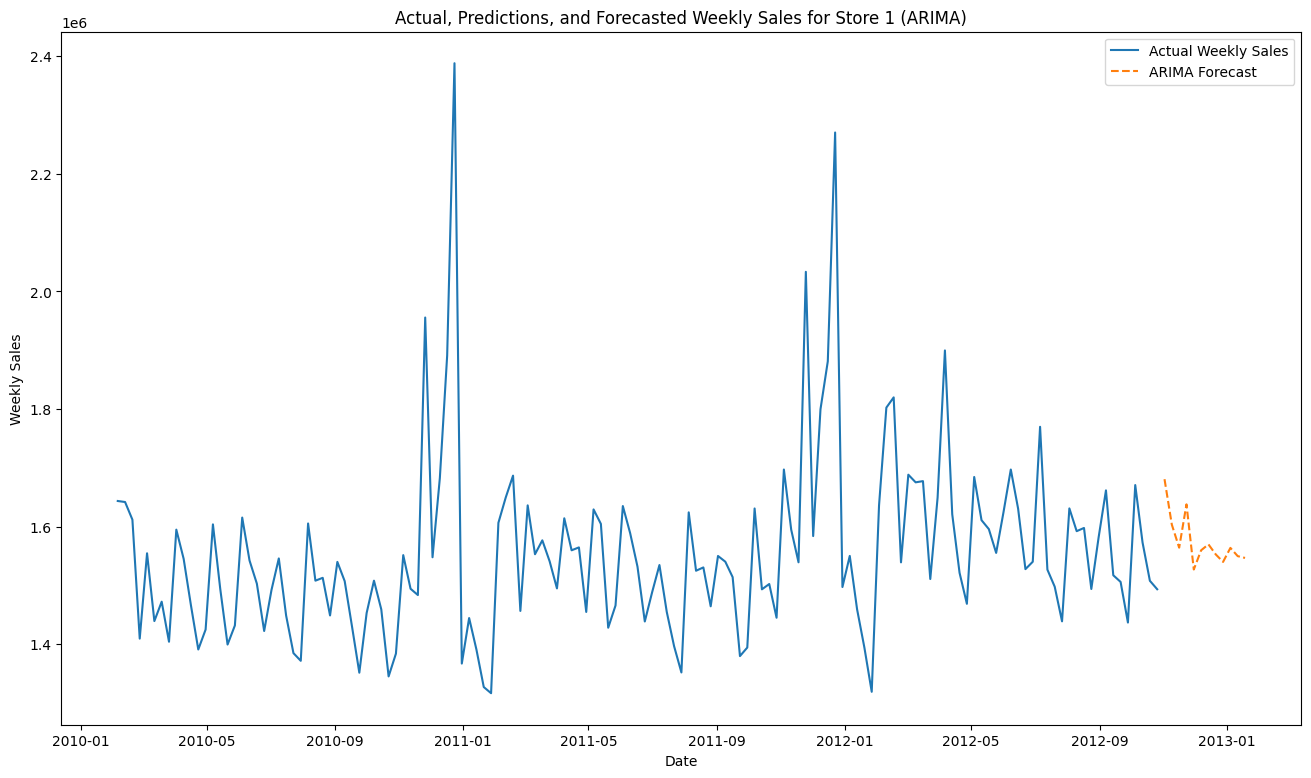

In [ ]:
# Splitting data into training and testing sets
train_size = int(len(store_1_data) * 0.8)  # 80% for training
train_data, test_data = store_1_data.iloc[:train_size], store_1_data.iloc[train_size:]

# Build ARIMA model for Store 1
model_store_1_arima = sm.tsa.ARIMA(train_data['Weekly_Sales'], order=(4, 0, 2))
results_store_1_arima = model_store_1_arima.fit()

# Evaluate Models on Test Set
predictions_store_1_arima = results_store_1_arima.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
rmse_store_1_arima = np.sqrt(mean_squared_error(test_data['Weekly_Sales'], predictions_store_1_arima))
print(f"RMSE for Store 1 (ARIMA): {rmse_store_1_arima}")

# Forecasting for the next 12 weeks after the last date in the existing data
forecast_start_date = store_1_data.index[-1] + pd.DateOffset(1)
forecast_dates = pd.date_range(start=forecast_start_date, periods=12, freq='W-FRI')
forecast_store_1_arima = results_store_1_arima.forecast(steps=12)

# Plotting actual, predictions during training, and forecasts for Store 1 (ARIMA)
plt.figure(figsize=(16, 9))
plt.plot(store_1_data['Weekly_Sales'], label='Actual Weekly Sales')
plt.plot(forecast_dates, forecast_store_1_arima, label='ARIMA Forecast', linestyle='--')
plt.title('Actual, Predictions, and Forecasted Weekly Sales for Store 1 (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

RMSE for Store 1 (ARIMA): 81021.99575724856


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationar

RMSE for Store 1 (SARIMAX): 186647.61891390296


In this case ARIMA model is giving better predicitions

In [ ]:
# Forecasting for the next 12 weeks
forecast_period = 12
forecast_store_1_arima = results_store_1_arima.forecast(steps=forecast_period)
print(f"Forecast for Store 1 (ARIMA):\n{forecast_store_1_arima}")

Forecast for Store 1 (ARIMA):
2012-04-13   1680790.09
2012-04-20   1603446.53
2012-04-27   1564352.79
2012-05-04   1637990.07
2012-05-11   1527217.97
2012-05-18   1559886.56
2012-05-25   1569994.88
2012-06-01   1552857.52
2012-06-08   1540175.41
2012-06-15   1563960.85
2012-06-22   1549951.10
2012-06-29   1546898.85
Freq: W-FRI, Name: predicted_mean, dtype: float64


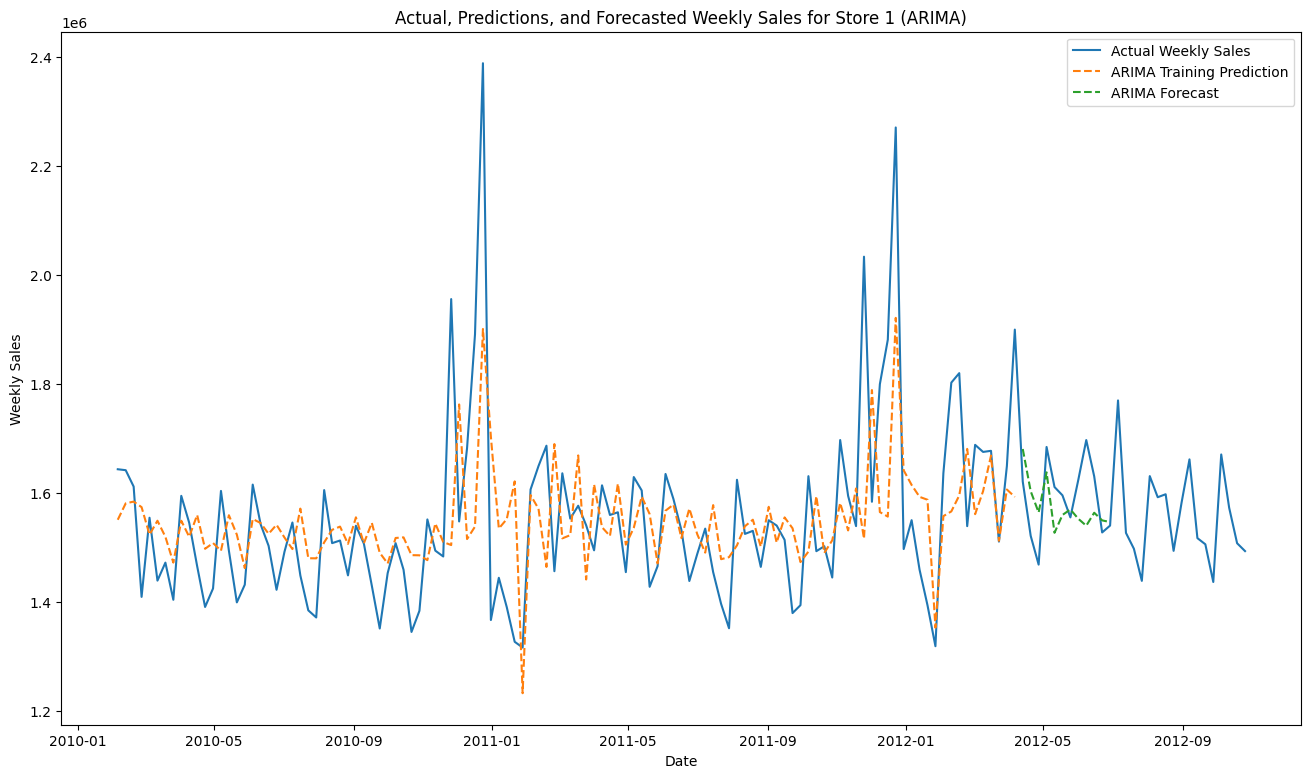

In [ ]:
# Plotting actual, predictions during training, and forecasts for Store 1 (ARIMA)
plt.figure(figsize=(16, 9))
plt.plot(store_1_data['Weekly_Sales'], label='Actual Weekly Sales')
plt.plot(results_store_1_arima.fittedvalues, label='ARIMA Training Prediction', linestyle='--')
plt.plot(forecast_store_1_arima, label='ARIMA Forecast', linestyle='--')
plt.title('Actual, Predictions, and Forecasted Weekly Sales for Store 1 (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

#Store 3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

RMSE for Store 3 (ARIMA): 19756.80718238884


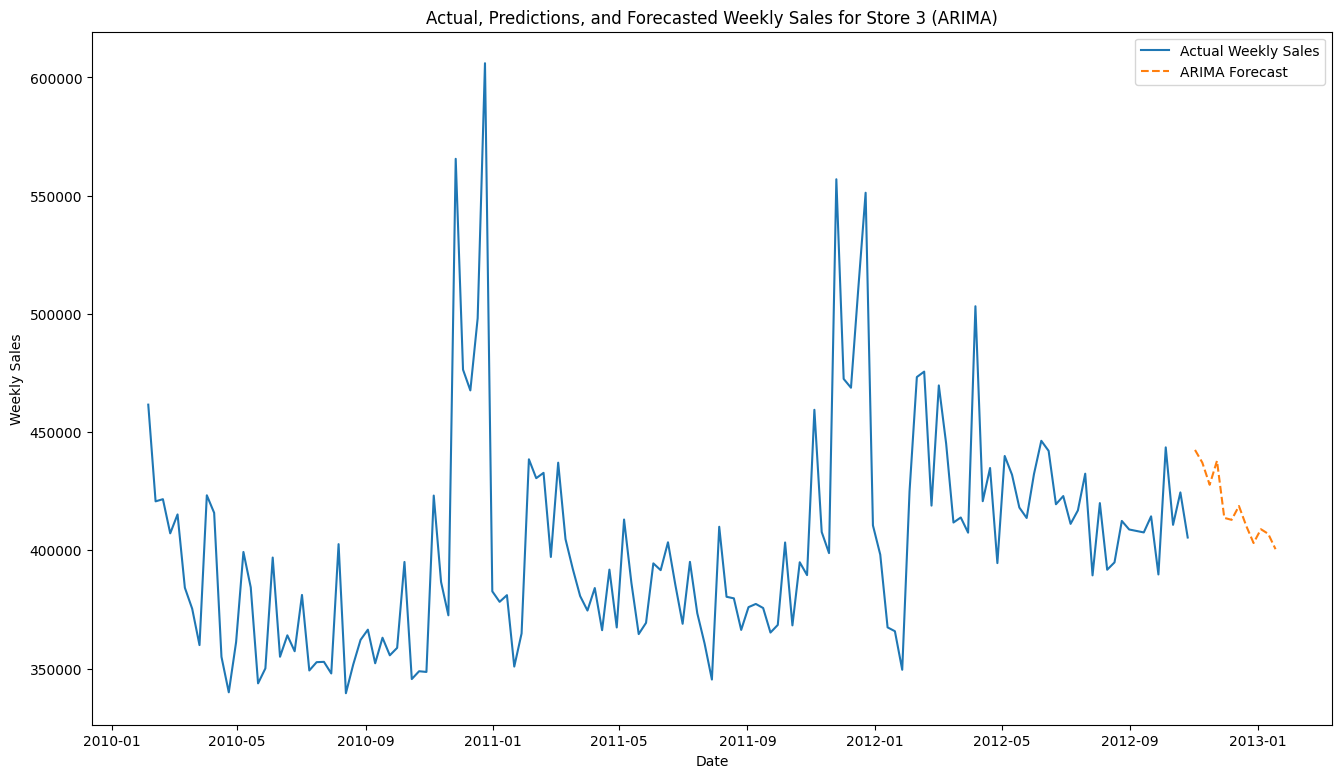

In [ ]:
# Filter data for Store 3
store_3_data = df[df['Store'] == 3].copy()

# Additional preprocessing steps
store_3_data['Date'] = pd.to_datetime(store_3_data['Date'], format='%d-%m-%Y')
store_3_data.set_index('Date', inplace=True)

# Handling missing values
store_3_data.dropna(subset=['Weekly_Sales'], inplace=True)

# Splitting data into training and testing sets
train_size = int(len(store_3_data) * 0.8)  # 80% for training
train_data, test_data = store_3_data.iloc[:train_size], store_3_data.iloc[train_size:]

# Build ARIMA model for Store 3
model_store_3_arima = sm.tsa.ARIMA(train_data['Weekly_Sales'], order=(4, 0, 2))
results_store_3_arima = model_store_3_arima.fit()

# Evaluate Models on Test Set
predictions_store_3_arima = results_store_3_arima.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
rmse_store_3_arima = np.sqrt(mean_squared_error(test_data['Weekly_Sales'], predictions_store_3_arima))
print(f"RMSE for Store 3 (ARIMA): {rmse_store_3_arima}")

# Forecasting for the next 12 weeks after the last date in the existing data
forecast_start_date = store_3_data.index[-1] + pd.DateOffset(1)
forecast_dates = pd.date_range(start=forecast_start_date, periods=12, freq='W-FRI')
forecast_store_3_arima = results_store_3_arima.forecast(steps=12)

# Plotting actual, predictions during training, and forecasts for Store 3 (ARIMA)
plt.figure(figsize=(16, 9))
plt.plot(store_3_data['Weekly_Sales'], label='Actual Weekly Sales')
plt.plot(forecast_dates, forecast_store_3_arima, label='ARIMA Forecast', linestyle='--')
plt.title('Actual, Predictions, and Forecasted Weekly Sales for Store 3 (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

Store 4

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

RMSE for Store 4 (ARIMA): 93713.27833924876


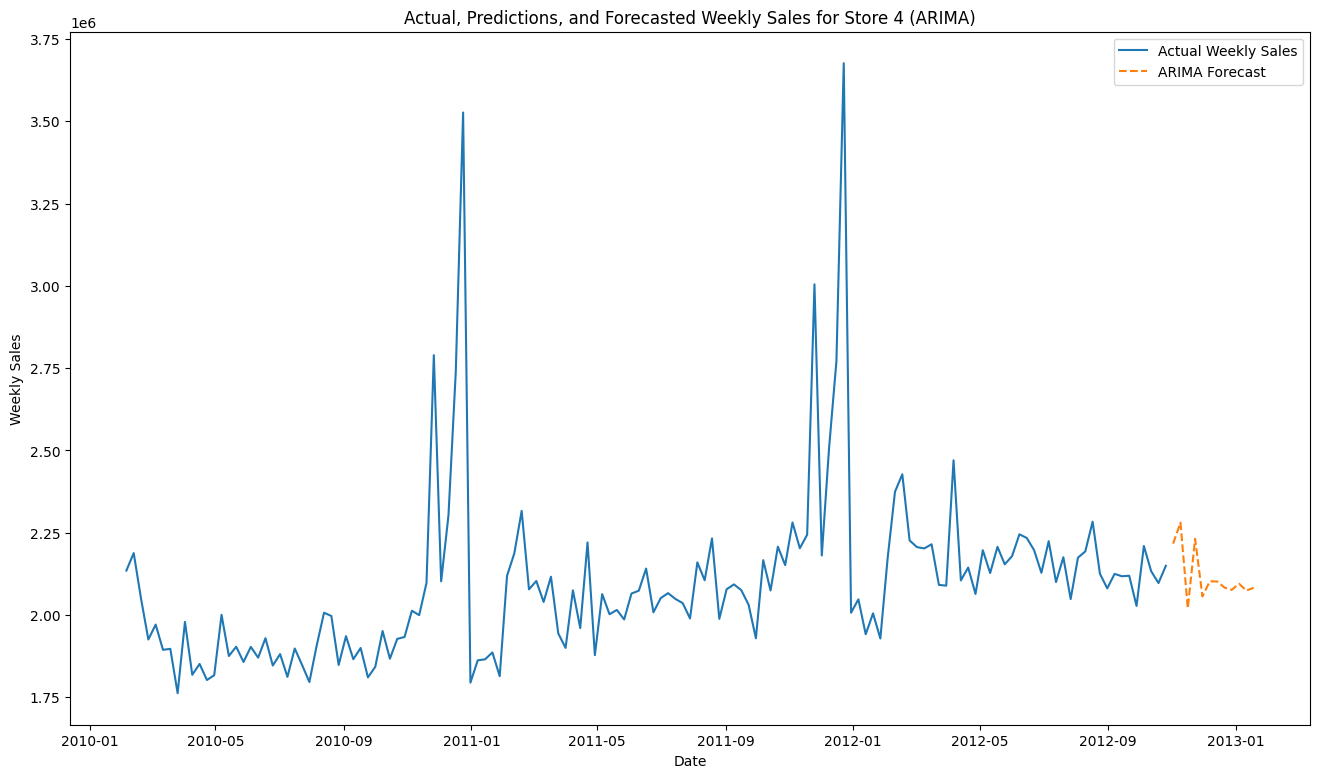

In [ ]:
# Filter data for Store 4
store_4_data = df[df['Store'] == 4].copy()

# Additional preprocessing steps
store_4_data['Date'] = pd.to_datetime(store_4_data['Date'], format='%d-%m-%Y')
store_4_data.set_index('Date', inplace=True)

# Handling missing values
store_4_data.dropna(subset=['Weekly_Sales'], inplace=True)

# Splitting data into training and testing sets
train_size = int(len(store_4_data) * 0.8)  # 80% for training
train_data, test_data = store_4_data.iloc[:train_size], store_4_data.iloc[train_size:]

# Build ARIMA model for Store 4
model_store_4_arima = sm.tsa.ARIMA(train_data['Weekly_Sales'], order=(4, 0, 2))
results_store_4_arima = model_store_4_arima.fit()

# Evaluate Models on Test Set
predictions_store_4_arima = results_store_4_arima.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
rmse_store_4_arima = np.sqrt(mean_squared_error(test_data['Weekly_Sales'], predictions_store_4_arima))
print(f"RMSE for Store 4 (ARIMA): {rmse_store_4_arima}")

# Forecasting for the next 12 weeks after the last date in the existing data
forecast_start_date = store_4_data.index[-1] + pd.DateOffset(1)
forecast_dates = pd.date_range(start=forecast_start_date, periods=12, freq='W-FRI')
forecast_store_4_arima = results_store_4_arima.forecast(steps=12)

# Plotting actual, predictions during training, and forecasts for Store 4 (ARIMA)
plt.figure(figsize=(16, 9))
plt.plot(store_4_data['Weekly_Sales'], label='Actual Weekly Sales')
plt.plot(forecast_dates, forecast_store_4_arima, label='ARIMA Forecast', linestyle='--')
plt.title('Actual, Predictions, and Forecasted Weekly Sales for Store 4 (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


#Store 5

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


RMSE for Store 5 (ARIMA): 16120.813002776078


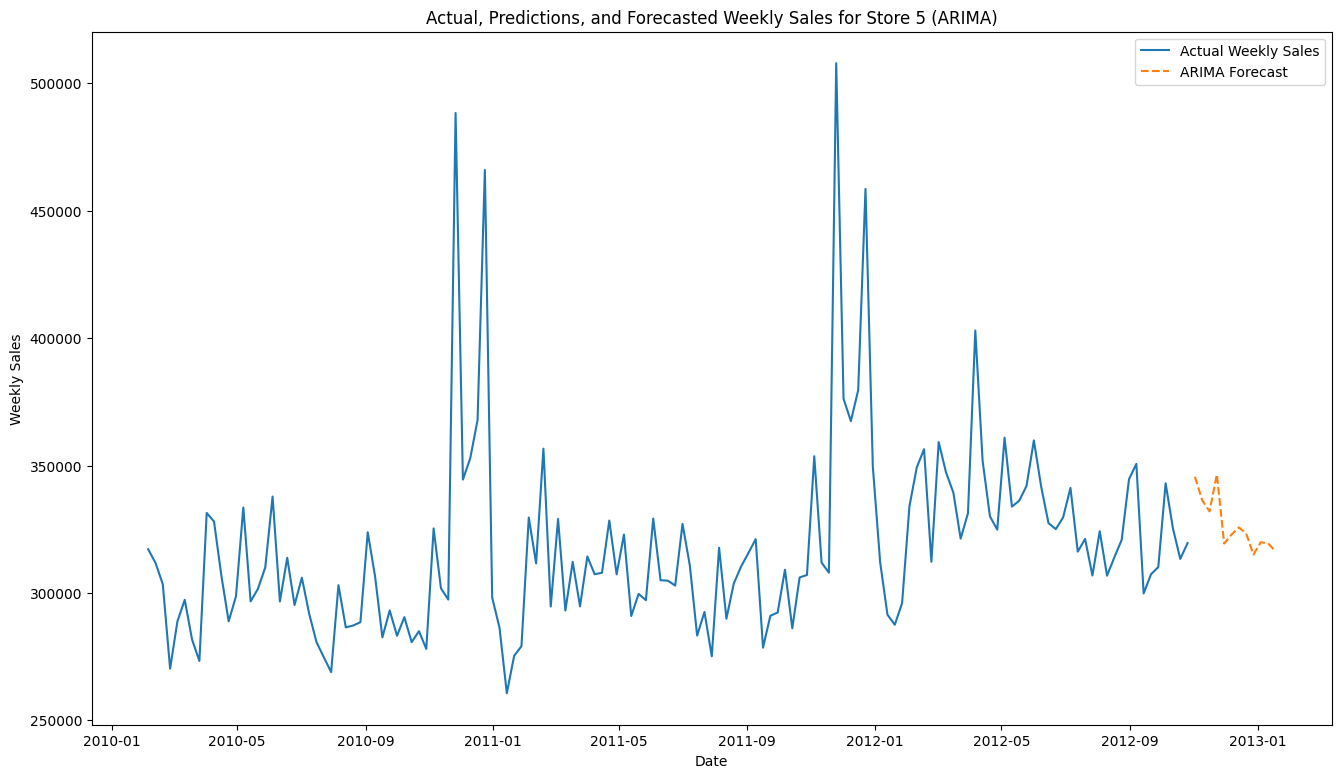

In [ ]:
# Assuming 'df' is your original DataFrame containing data for all stores

# Filter data for Store 5
store_5_data = df[df['Store'] == 5].copy()

# Additional preprocessing steps
store_5_data['Date'] = pd.to_datetime(store_5_data['Date'], format='%d-%m-%Y')
store_5_data.set_index('Date', inplace=True)

# Handling missing values
store_5_data.dropna(subset=['Weekly_Sales'], inplace=True)

# Splitting data into training and testing sets
train_size = int(len(store_5_data) * 0.8)  # 80% for training
train_data, test_data = store_5_data.iloc[:train_size], store_5_data.iloc[train_size:]

# Build ARIMA model for Store 5
model_store_5_arima = sm.tsa.ARIMA(train_data['Weekly_Sales'], order=(4, 0, 2))
results_store_5_arima = model_store_5_arima.fit()

# Evaluate Models on Test Set
predictions_store_5_arima = results_store_5_arima.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
rmse_store_5_arima = np.sqrt(mean_squared_error(test_data['Weekly_Sales'], predictions_store_5_arima))
print(f"RMSE for Store 5 (ARIMA): {rmse_store_5_arima}")

# Forecasting for the next 12 weeks after the last date in the existing data
forecast_start_date = store_5_data.index[-1] + pd.DateOffset(1)
forecast_dates = pd.date_range(start=forecast_start_date, periods=12, freq='W-FRI')
forecast_store_5_arima = results_store_5_arima.forecast(steps=12)

# Plotting actual, predictions during training, and forecasts for Store 5 (ARIMA)
plt.figure(figsize=(16, 9))
plt.plot(store_5_data['Weekly_Sales'], label='Actual Weekly Sales')
plt.plot(forecast_dates, forecast_store_5_arima, label='ARIMA Forecast', linestyle='--')
plt.title('Actual, Predictions, and Forecasted Weekly Sales for Store 5 (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()